In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/dataset_titanic.csv")
df_titanic.head()

In [3]:
df_titanic.columns
df_titanic.describe()
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_titanic.drop(['Cabin','PassengerId','Name','Ticket','Embarked ', 'Sex'], axis=1,inplace=True)
df_titanic.dropna(inplace=True)
df_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [12]:
X= df_titanic[["Pclass","Age","SibSp","Parch"]]
Y= df_titanic['Survived']
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=4)
arbol.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

<function matplotlib.pyplot.show>

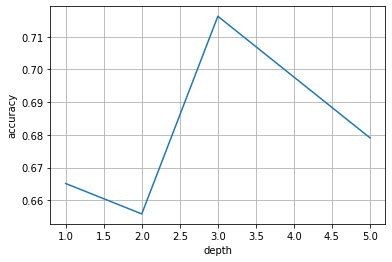

In [26]:
depth_list = list(range(1,6))
accuracy_list=[]
for depth in depth_list:
  arbol = DecisionTreeClassifier(max_depth=depth,random_state=42)
  arbol.fit(X_train,Y_train)
  score= arbol.score(X_test,Y_test)
  accuracy_list.append(score)
plt.plot(depth_list, accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show

In [22]:
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp.fit(X, Y)
df_titanic.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [24]:
X= df_titanic[["Pclass","Age","SibSp","Parch"]]
Y= df_titanic['Survived']
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=4)
arbol.fit(X_train,Y_train)

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [25]:
arbol = DecisionTreeClassifier(max_depth = 3,random_state = 0)
arbol.fit(X_train,Y_train)
y_train_predi=arbol.predict(X_train)
y_test_predi= arbol.predict(X_test)
print("Accuracy of train: %"+ str(accuracy_score(y_train_predi,Y_train)))
print("Accuracy of test: %"+ str(accuracy_score(y_test_predi, Y_test)))
print("Accuracy Global %"+ str(arbol.score(X_test,Y_test)))

Accuracy of train: %0.7454909819639278
Accuracy of test: %0.7162790697674418
Accuracy Global %0.7162790697674418


In [28]:
classs_name_list= list(["dead","live"])
dot_data= export_graphviz(arbol, feature_names=["Pclass","Age","SibSp","Parch"],class_names=classs_name_list)
graphic= graph_from_dot_data(dot_data)
graphic.write_png("arbol_titanic_v3.png")

True